In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train_taxi_dataset.csv')

Data Understanding

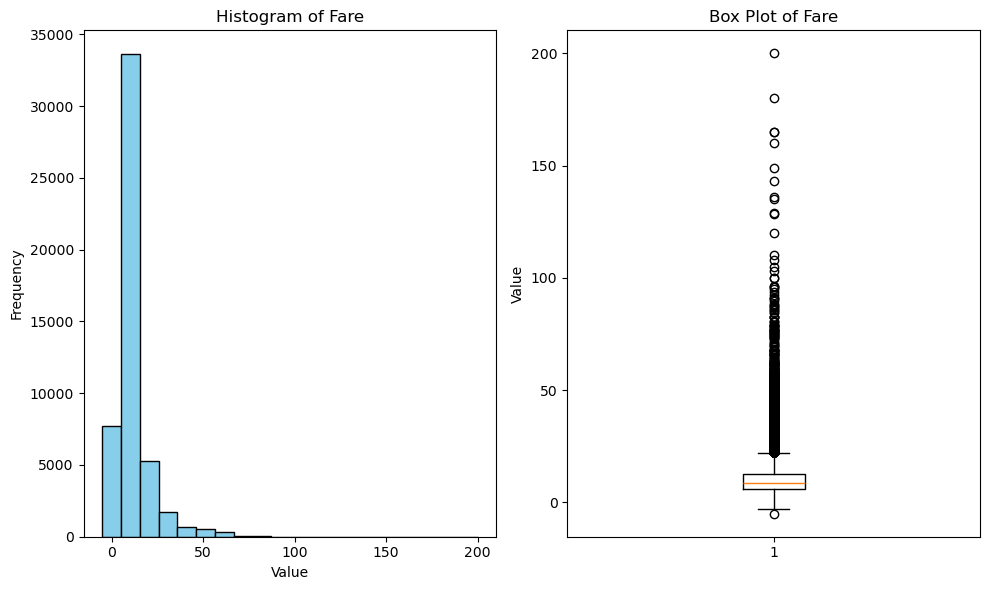

In [4]:
plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
plt.hist(df['fare_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.boxplot(df['fare_amount'])
plt.title('Box Plot of Fare')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [5]:
null_counts = df.isnull().sum()

any_null = df.isnull().any().any()

print("Null counts per column:")
print(null_counts)

print("\nAny null values exist:", any_null)

Null counts per column:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Any null values exist: False


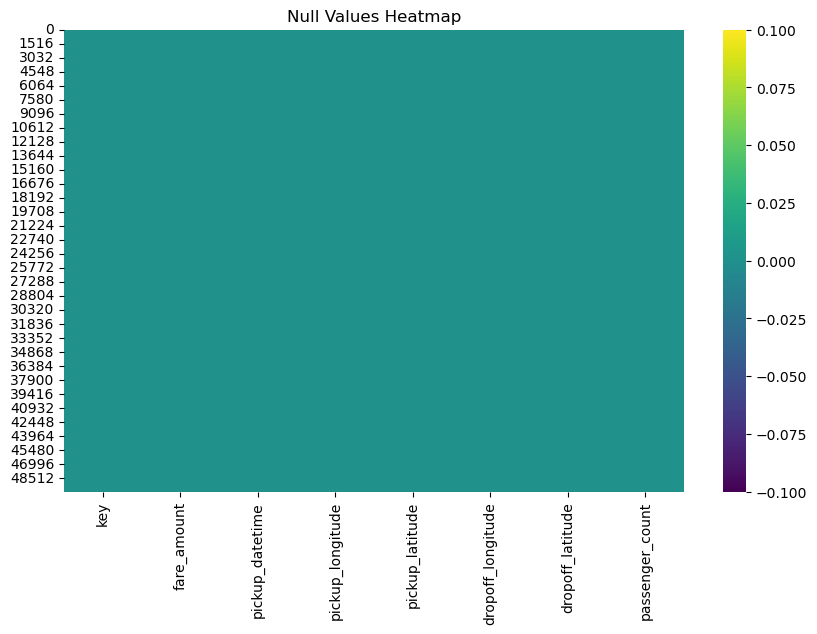

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True
           )
plt.title('Null Values Heatmap')
plt.show()


In [7]:
Q1 = df['fare_amount'].quantile(0.25)

Q3 = df['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
                                 key  fare_amount          pickup_datetime  \
31       2015-06-21 21:46:34.0000001        22.54  2015-06-21 21:46:34 UTC   
32     2009-01-09 16:10:00.000000170        31.90  2009-01-09 16:10:00 UTC   
35       2015-01-11 03:15:38.0000001        58.00  2015-01-11 03:15:38 UTC   
54       2013-11-10 01:12:19.0000002        25.50  2013-11-10 01:12:19 UTC   
56      2010-05-31 18:06:00.00000097        34.67  2010-05-31 18:06:00 UTC   
...                              ...          ...                      ...   
49948    2014-11-13 06:28:05.0000003        57.33  2014-11-13 06:28:05 UTC   
49950   2010-08-24 13:50:00.00000072        25.30  2010-08-24 13:50:00 UTC   
49961    2015-02-16 06:47:17.0000002        48.83  2015-02-16 06:47:17 UTC   
49962    2014-06-25 14:33:16.0000002        34.00  2014-06-25 14:33:16 UTC   
49968    2015-04-16 01:46:12.0000001        57.54  2015-04-16 01:46:12 UTC   

       pickup_longitude  pickup_latitude  dropoff_lon

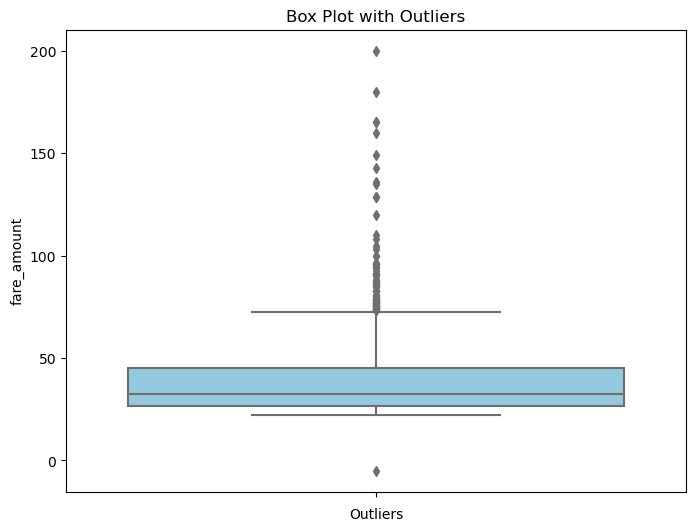

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers, y='fare_amount', color='skyblue')
plt.title('Box Plot with Outliers')
plt.ylabel('fare_amount')
plt.xlabel('Outliers')
plt.show()

In [9]:
duplicate_rows = df[df.duplicated()]

print("Duplicate records:")
print(duplicate_rows)

Duplicate records:
Empty DataFrame
Columns: [key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count]
Index: []


Data Preparation  

In [10]:
pickup_longitude_index = df.columns.get_loc('pickup_longitude')
pickup_latitude_index = df.columns.get_loc('pickup_latitude')
dropoff_longitude_index = df.columns.get_loc('dropoff_longitude')
dropoff_latitude_index = df.columns.get_loc('dropoff_latitude')

pickup_longitude_values = df.iloc[:, pickup_longitude_index].values.reshape(-1, 1)
pickup_latitude_values = df.iloc[:, pickup_latitude_index].values.reshape(-1, 1)
dropoff_longitude_values = df.iloc[:, dropoff_longitude_index].values.reshape(-1, 1)
dropoff_latitude_values = df.iloc[:, dropoff_latitude_index].values.reshape(-1, 1)

scaler_pickup_longitude = StandardScaler()
scaler_pickup_latitude = StandardScaler()
scaler_dropoff_longitude = StandardScaler()
scaler_dropoff_latitude = StandardScaler()

pickup_longitude_values_scaled = scaler_pickup_longitude.fit_transform(pickup_longitude_values)
pickup_latitude_values_scaled = scaler_pickup_latitude.fit_transform(pickup_latitude_values)
dropoff_longitude_values_scaled = scaler_dropoff_longitude.fit_transform(dropoff_longitude_values)
dropoff_latitude_values_scaled = scaler_dropoff_latitude.fit_transform(dropoff_latitude_values)

df.iloc[:, pickup_longitude_index] = pickup_longitude_values_scaled.flatten()
df.iloc[:, pickup_latitude_index] = pickup_latitude_values_scaled.flatten()
df.iloc[:, dropoff_longitude_index] = dropoff_longitude_values_scaled.flatten()
df.iloc[:, dropoff_latitude_index] = dropoff_latitude_values_scaled.flatten()


In [34]:
df

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,-0.128400,0.126520,-0.128465,0.130685,1,0.463176
1,2010-01-05 16:52:16.0000002,16.9,-0.144923,0.124911,-0.141692,0.142277,1,1.964218
2,2011-08-18 00:35:00.00000049,5.7,-0.141718,0.132938,-0.142842,0.137050,2,0.474014
3,2012-04-21 04:30:42.0000001,7.7,-0.142141,0.128419,-0.142873,0.138302,1,1.101898
4,2010-03-09 07:51:00.000000135,5.3,-0.140309,0.134020,-0.139519,0.142570,1,0.954699
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,-0.143376,0.130891,-0.145308,0.129640,1,0.255901
49996,2015-06-22 17:19:18.0000007,7.5,-0.141912,0.134053,-0.142470,0.138718,1,0.522453
49997,2011-01-30 04:53:00.00000063,6.9,-0.143638,0.129429,-0.143502,0.138533,1,1.012439
49998,2012-11-06 07:09:00.00000069,4.5,-0.138189,0.135556,-0.139211,0.141892,2,0.713657


Data cleaning 

In [12]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [13]:
df

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,-0.128400,0.126520,-0.128465,0.130685,1
1,2010-01-05 16:52:16.0000002,16.9,-0.144923,0.124911,-0.141692,0.142277,1
2,2011-08-18 00:35:00.00000049,5.7,-0.141718,0.132938,-0.142842,0.137050,2
3,2012-04-21 04:30:42.0000001,7.7,-0.142141,0.128419,-0.142873,0.138302,1
4,2010-03-09 07:51:00.000000135,5.3,-0.140309,0.134020,-0.139519,0.142570,1
...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,-0.143376,0.130891,-0.145308,0.129640,1
49996,2015-06-22 17:19:18.0000007,7.5,-0.141912,0.134053,-0.142470,0.138718,1
49997,2011-01-30 04:53:00.00000063,6.9,-0.143638,0.129429,-0.143502,0.138533,1
49998,2012-11-06 07:09:00.00000069,4.5,-0.138189,0.135556,-0.139211,0.141892,2


Feature engineering

In [14]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  

    return distance

pickup_lat = df['pickup_latitude']
pickup_lon = df['pickup_longitude']
dropoff_lat = df['dropoff_latitude']
dropoff_lon = df['dropoff_longitude']

df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                         row['dropoff_latitude'], row['dropoff_longitude']),
                          axis=1)

In [15]:
df

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,-0.128400,0.126520,-0.128465,0.130685,1,0.463176
1,2010-01-05 16:52:16.0000002,16.9,-0.144923,0.124911,-0.141692,0.142277,1,1.964218
2,2011-08-18 00:35:00.00000049,5.7,-0.141718,0.132938,-0.142842,0.137050,2,0.474014
3,2012-04-21 04:30:42.0000001,7.7,-0.142141,0.128419,-0.142873,0.138302,1,1.101898
4,2010-03-09 07:51:00.000000135,5.3,-0.140309,0.134020,-0.139519,0.142570,1,0.954699
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,-0.143376,0.130891,-0.145308,0.129640,1,0.255901
49996,2015-06-22 17:19:18.0000007,7.5,-0.141912,0.134053,-0.142470,0.138718,1,0.522453
49997,2011-01-30 04:53:00.00000063,6.9,-0.143638,0.129429,-0.143502,0.138533,1,1.012439
49998,2012-11-06 07:09:00.00000069,4.5,-0.138189,0.135556,-0.139211,0.141892,2,0.713657


In [16]:
X = df.loc[:,['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']]
y = df.drop(columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance','key'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [18]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 27.1548513997339


In [20]:
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.7079210040518731


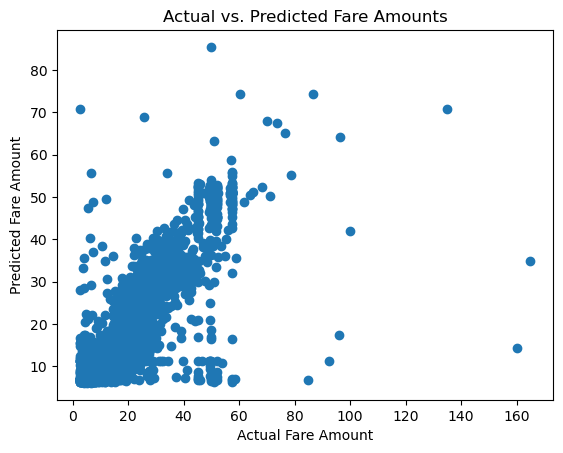

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare Amounts")
plt.show()

In [30]:
model = GradientBoostingRegressor(max_depth = 7, n_estimators = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

In [24]:
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [26]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 25.355071681526844


In [32]:
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.7272795284379381


In [35]:
df.corr(numeric_only = True)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583,0.010218
pickup_longitude,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604,0.183069
pickup_latitude,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237,-0.027068
dropoff_longitude,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936,0.187460
dropoff_latitude,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958,-0.173711
passenger_count,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000,-0.006158
distance,0.010218,0.183069,-0.027068,0.187460,-0.173711,-0.006158,1.000000


In [37]:
df2 =df.copy()

In [173]:
df2 = pd.read_csv('train_taxi_dataset.csv')

In [120]:
df2

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [121]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  

    return distance

pickup_lat = df2['pickup_latitude']
pickup_lon = df2['pickup_longitude']
dropoff_lat = df2['dropoff_latitude']
dropoff_lon = df2['dropoff_longitude']

df2['distance'] = df2.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                         row['dropoff_latitude'], row['dropoff_longitude']),
                          axis=1)

In [122]:
df2

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


In [123]:
df2.corr(numeric_only = True)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583,0.015667
pickup_longitude,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604,0.142805
pickup_latitude,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237,-0.125606
dropoff_longitude,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936,0.145640
dropoff_latitude,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958,-0.127274
passenger_count,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000,-0.005588
distance,0.015667,0.142805,-0.125606,0.145640,-0.127274,-0.005588,1.000000


In [174]:
df2.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [175]:
df2.drop(['key', 'pickup_datetime', 'passenger_count'] , axis=1, inplace=True )

In [176]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4.5,-73.844311,40.721319,-73.841610,40.712278
1,16.9,-74.016048,40.711303,-73.979268,40.782004
2,5.7,-73.982738,40.761270,-73.991242,40.750562
3,7.7,-73.987130,40.733143,-73.991567,40.758092
4,5.3,-73.968095,40.768008,-73.956655,40.783762
...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993
49996,7.5,-73.984756,40.768211,-73.987366,40.760597
49997,6.9,-74.002698,40.739428,-73.998108,40.759483
49998,4.5,-73.946062,40.777567,-73.953450,40.779687


<Axes: >

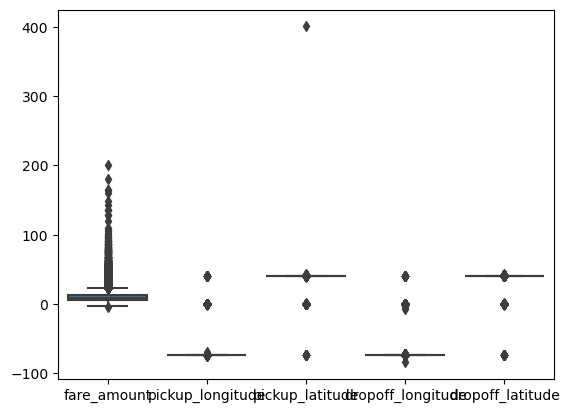

In [177]:
sns.boxplot(df2)

In [178]:
from sklearn.preprocessing import RobustScaler

In [179]:
X = df2.drop('fare_amount', axis=1 )
y = df2['fare_amount']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [184]:
scaler = RobustScaler().fit(X_train)

In [182]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
39087,-73.974332,40.791427,-73.979032,40.766365
30893,-73.973657,40.751632,-73.969945,40.756702
45278,-73.975263,40.752280,-73.995098,40.737500
16398,-73.983034,40.766784,-73.971944,40.789289
13653,-73.986717,40.771648,-73.982140,40.770699
...,...,...,...,...
11284,-73.980910,40.767860,-73.980212,40.780342
44732,-73.960564,40.775861,-73.961830,40.771255
38158,-73.974665,40.751742,-73.995985,40.744347
860,-73.987243,40.722410,-73.971620,40.761990


In [183]:
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [185]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
model = GradientBoostingRegressor(max_depth = 7, n_estimators = 100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [187]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 26.657113728443115


In [188]:
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.7132746963676997


In [198]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4.5,-73.844311,40.721319,-73.841610,40.712278
1,16.9,-74.016048,40.711303,-73.979268,40.782004
2,5.7,-73.982738,40.761270,-73.991242,40.750562
3,7.7,-73.987130,40.733143,-73.991567,40.758092
4,5.3,-73.968095,40.768008,-73.956655,40.783762
...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993
49996,7.5,-73.984756,40.768211,-73.987366,40.760597
49997,6.9,-74.002698,40.739428,-73.998108,40.759483
49998,4.5,-73.946062,40.777567,-73.953450,40.779687


In [224]:
def outlier_cleaner(col):
    Q1 = np.percentile(col,25)
    Q3 = np.percentile(col,75)
    IQR = Q3 - Q1
    higher_fence = Q3 + 1.5*IQR
    lower_fence = Q1 - 1.5*IQR
    cleaned_cols = col[(col <= higher_fence) & (col >= lower_fence)]
    return cleaned_cols

In [225]:
z  = df2.apply(outlier_cleaner, axis = 1)

In [230]:
z.dropna(inplace = True)

In [235]:
z

,index,dropoff_latitude,dropoff_longitude,fare_amount,pickup_latitude,pickup_longitude
0,0,40.712278,-73.841610,4.5,40.721319,-73.844311
1,1,40.782004,-73.979268,16.9,40.711303,-74.016048
2,2,40.750562,-73.991242,5.7,40.761270,-73.982738
3,3,40.758092,-73.991567,7.7,40.733143,-73.987130
4,4,40.783762,-73.956655,5.3,40.768008,-73.968095
...,...,...,...,...,...,...
48990,49995,40.705993,-74.016899,15.0,40.748531,-73.999973
48991,49996,40.760597,-73.987366,7.5,40.768211,-73.984756
48992,49997,40.759483,-73.998108,6.9,40.739428,-74.002698
48993,49998,40.779687,-73.953450,4.5,40.777567,-73.946062


In [234]:
z.reset_index(inplace = True)

<Axes: >

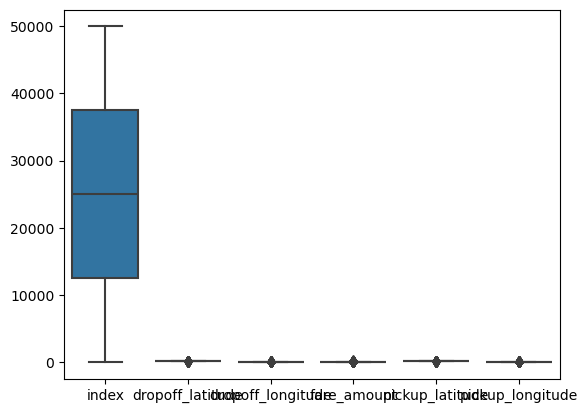

In [236]:
sns.boxplot(z)

In [238]:
z.drop('index', axis = 1)

,dropoff_latitude,dropoff_longitude,fare_amount,pickup_latitude,pickup_longitude
0,40.712278,-73.841610,4.5,40.721319,-73.844311
1,40.782004,-73.979268,16.9,40.711303,-74.016048
2,40.750562,-73.991242,5.7,40.761270,-73.982738
3,40.758092,-73.991567,7.7,40.733143,-73.987130
4,40.783762,-73.956655,5.3,40.768008,-73.968095
...,...,...,...,...,...
48990,40.705993,-74.016899,15.0,40.748531,-73.999973
48991,40.760597,-73.987366,7.5,40.768211,-73.984756
48992,40.759483,-73.998108,6.9,40.739428,-74.002698
48993,40.779687,-73.953450,4.5,40.777567,-73.946062
